In [1]:
from netCDF4 import Dataset
import cmocean.cm as cmo
import numpy as np
import salem
import xarray as xr

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
usgs_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/usgs_1h/wrfout_test')
wur_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_1h/wrfout_test')
wur_lcz_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/wur_lcz_1h/wrfout_test')
modis_file = salem.open_wrf_dataset('/home/cdonnely/Urban-M4/misc/workflows/snakemake/output/modis_lcz_1h/wrfout_test')

usgs_file

<xarray.Dataset> Size: 10GB
Dimensions:                (south_north: 165, west_east: 220, time: 45,
                            bottom_top: 60, soil_layers: 3, seed_dim: 7)
Coordinates:
    lat                    (south_north, west_east) float32 145kB 52.29 ... 5...
    lon                    (south_north, west_east) float32 145kB 4.728 ... 5...
    xtime                  (time) datetime64[ns] 360B ...
  * time                   (time) datetime64[ns] 360B 2019-07-23T06:00:00 ......
  * west_east              (west_east) float64 2kB -8.411e+04 ... -6.221e+04
  * south_north            (south_north) float64 1kB 3.535e+04 ... 5.175e+04
Dimensions without coordinates: bottom_top, soil_layers, seed_dim
Data variables: (12/211)
    LU_INDEX               (time, south_north, west_east) float32 7MB ...
    ZNU                    (time, bottom_top) float32 11kB ...
    ZNW                    (time, bottom_top) float32 11kB ...
    ZS                     (time, soil_layers) float32 540B ...
    DZS                    (time, soil_layers) float32 540B ...
    VAR_SSO                (time, south_north, west_east) float32 7MB ...
    ...                     ...
    PRESSURE               (time, bottom_top, south_north, west_east) float32 392MB ...
    GEOPOTENTIAL           (time, bottom_top, south_north, west_east) float32 392MB ...
    Z                      (time, bottom_top, south_north, west_east) float32 392MB ...
    SLP                    (time, south_north, west_east) float32 7MB ...
    PRCP_NC                (time, south_north, west_east) float32 7MB ...
    PRCP_C                 (time, south_north, west_east) float32 7MB ...
Attributes: (12/137)
    TITLE:                            OUTPUT FROM WRF V4.6.0 MODEL
    START_DATE:                      2019-07-23_06:00:00
    SIMULATION_START_DATE:           2019-07-23_06:00:00
    WEST-EAST_GRID_DIMENSION:        221
    SOUTH-NORTH_GRID_DIMENSION:      166
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ISICE:                           24
    ISURBAN:                         1
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2
    pyproj_srs:                      +proj=lcc +lat_0=51.9647178649902 +lon_0...

In [3]:
usgs_luindex = usgs_file.LU_INDEX.isel(time=5)
wur_luindex = wur_file.LU_INDEX.isel(time=5)
wur_lcz_luindex = wur_lcz_file.LU_INDEX.isel(time=5)
modis_luindex = modis_file.LU_INDEX.isel(time=5)

In [4]:
lcz_lus = wur_lcz_file.LU_INDEX.where(wur_lcz_file.LU_INDEX > 51, np.nan, 1)
lcz_lu = lcz_lus.isel(time=5)

wur_lus = wur_file.LU_INDEX.where(wur_file.LU_INDEX == 1)
wur_lu = wur_lus.isel(time=5)

In [5]:
# Open variables
usgs_var = usgs_file.T2
wur_var = wur_file.T2
wur_lcz_var = wur_lcz_file.T2
modis_var = modis_file.T2

# Select time
usgs_T2 = usgs_var.isel(time=34)
wur_T2 = wur_var.isel(time=34)
wur_lcz_T2 = wur_lcz_var.isel(time=34)
modis_T2 = modis_var.isel(time=34)

wur_T2

<xarray.DataArray 'T2' (south_north: 165, west_east: 220)> Size: 145kB
[36300 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 145kB 52.29 52.29 ... 52.44
    lon          (south_north, west_east) float32 145kB 4.728 4.73 ... 5.056
    xtime        datetime64[ns] 8B ...
    time         datetime64[ns] 8B 2019-07-24T16:00:00
  * west_east    (west_east) float64 2kB -8.411e+04 -8.401e+04 ... -6.221e+04
  * south_north  (south_north) float64 1kB 3.535e+04 3.545e+04 ... 5.175e+04
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=51.9647178649902 +lon_0=6 +lat_1=30 +lat_2...

In [6]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'x-large',
    'fontweight': 'bold',
}
proj = ccrs.PlateCarree()
extent = [usgs_luindex.lon.min(), usgs_luindex.lon.max(), usgs_luindex.lat.min(), usgs_luindex.lat.max()]

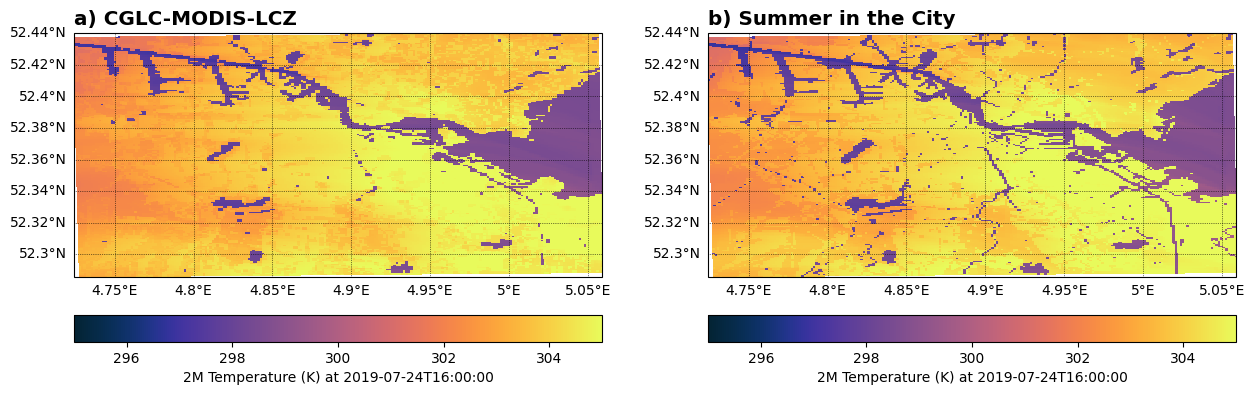

In [7]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)

ct1 = ax1.pcolormesh(
    wur_lcz_T2.lon, wur_lcz_T2.lat, wur_lcz_T2, vmin=295, vmax=305, cmap=cmo.thermal, transform=ccrs.PlateCarree())


ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ', **title_options)
cbar = fig.colorbar(ct1, orientation='horizontal', fraction=0.09, pad=0.1, label='2M Temperature (K) at 2019-07-24T16:00:00', ax=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)

ct2 = ax2.pcolormesh(
    wur_T2.lon, wur_T2.lat, wur_T2, vmin=295, vmax=305, cmap=cmo.thermal, transform=ccrs.PlateCarree())
ax2.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) Summer in the City', **title_options)
cbar = fig.colorbar(ct2, orientation='horizontal', fraction=0.09, pad=0.1, label='2M Temperature (K) at 2019-07-24T16:00:00', ax=ax2)

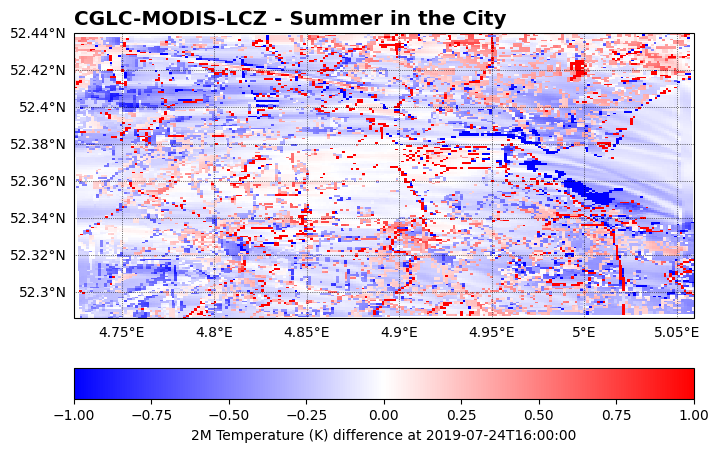

In [8]:
diff = wur_lcz_T2 - wur_T2

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1, projection=proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    wur_T2.lon, wur_T2.lat, diff, vmin = -1, vmax = 1, cmap='bwr', transform=ccrs.PlateCarree()
)
ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('CGLC-MODIS-LCZ - Summer in the City', **title_options)
cbar = fig.colorbar(ct1, orientation='horizontal', fraction=0.09, pad=0.08, label='2M Temperature (K) difference at 2019-07-24T16:00:00', ax=ax1)

In [9]:
wur_urbanT = wur_var.where(wur_lus == 1)
lcz_urbanT = wur_lcz_var.where(lcz_lus > 1)

mean_urban_wur = wur_urbanT.mean(dim=("west_east","south_north"))
mean_urban_lcz = lcz_urbanT.mean(dim=("west_east","south_north"))

In [10]:
wur_rural = wur_var.where(wur_lus != 1)
lcz_rural = wur_lcz_var.where(np.isnan(lcz_lus))

wur_rural = wur_rural.where(wur_file.LANDMASK == 1)
lcz_rural = lcz_rural.where(wur_lcz_file.LANDMASK == 1)

mean_rural_wur = wur_rural.mean(dim=("west_east","south_north"))
mean_rural_lcz = lcz_rural.mean(dim=("west_east","south_north"))

In [11]:
wur_rural_t2 = wur_rural.isel(time=34)
lcz_rural_t2 = lcz_rural.isel(time=34)

mean_rural_wur_t2 = wur_rural_t2.mean(dim=("west_east","south_north"))
mean_rural_lcz_t2 = lcz_rural_t2.mean(dim=("west_east","south_north"))

diff_wur = wur_T2 - mean_rural_wur_t2
diff_lcz = wur_lcz_T2 - mean_rural_lcz_t2

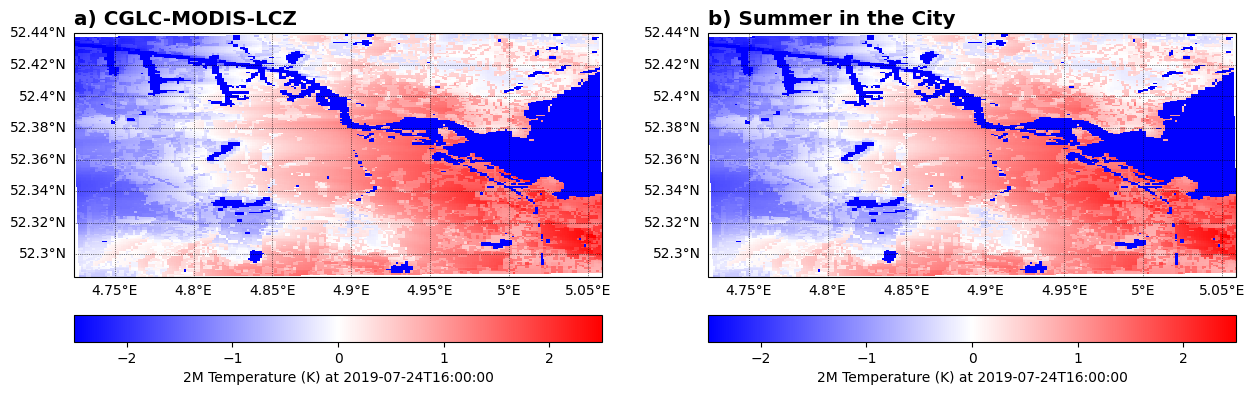

In [18]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=proj)
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)

ct1 = ax1.pcolormesh(
    diff_lcz.lon, diff_lcz.lat, diff_lcz, vmin=-2.5, vmax=2.5, cmap='bwr', transform=ccrs.PlateCarree())


ax1.coastlines(linewidth=1.0, resolution='10m')
ax1.set_title('a) CGLC-MODIS-LCZ', **title_options)
cbar = fig.colorbar(ct1, orientation='horizontal', fraction=0.09, pad=0.1, label='2M Temperature (K) at 2019-07-24T16:00:00', ax=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=proj)
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)

ct2 = ax2.pcolormesh(
    diff_lcz.lon, diff_lcz.lat, diff_lcz, vmin=-2.5, vmax=2.5, cmap='bwr', transform=ccrs.PlateCarree())
ax2.coastlines(linewidth=1.0, resolution='10m')
ax2.set_title('b) Summer in the City', **title_options)
cbar = fig.colorbar(ct2, orientation='horizontal', fraction=0.09, pad=0.1, label='2M Temperature (K) at 2019-07-24T16:00:00', ax=ax2)

In [13]:
from matplotlib.lines import Line2D

means = wur_lcz_var.mean(dim=("west_east","south_north"))
mins = wur_lcz_var.min(dim=("west_east","south_north"))
maxs = wur_lcz_var.max(dim=("west_east","south_north"))

means_wur = wur_var.mean(dim=("west_east","south_north"))
mins_wur = wur_var.min(dim=("west_east","south_north"))
maxs_wur = wur_var.max(dim=("west_east","south_north"))

means_modis = modis_var.mean(dim=("west_east","south_north"))
mins_modis = modis_var.min(dim=("west_east","south_north"))
maxs_modis = modis_var.max(dim=("west_east","south_north"))

means_usgs = usgs_var.mean(dim=("west_east","south_north"))
mins_usgs = usgs_var.min(dim=("west_east","south_north"))
maxs_usgs = usgs_var.max(dim=("west_east","south_north"))

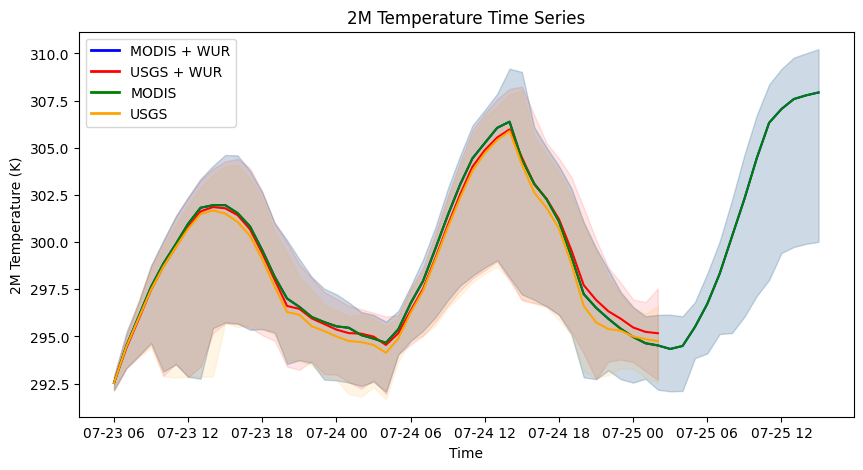

In [14]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
lines = ax2.plot(means.time.values, means, linestyle='-', color='blue', linewidth=1.5)
ax2.fill_between(means.time.values, mins, maxs, alpha=0.1, color='blue')

lines = ax2.plot(means_wur.time.values, means_wur, linestyle='-', color='red', linewidth=1.5)
ax2.fill_between(means_wur.time.values, mins_wur, maxs_wur, alpha=0.1, color='red')

lines = ax2.plot(means_modis.time.values, means_modis, linestyle='-', color='green', linewidth=1.5)
ax2.fill_between(means_modis.time.values, mins_modis, maxs_modis, alpha=0.1, color='green')

lines = ax2.plot(means_usgs.time.values, means_usgs, linestyle='-', color='orange', linewidth=1.5)
ax2.fill_between(means_usgs.time.values, mins_usgs, maxs_usgs, alpha=0.1, color='orange')

ax2.set_xlabel('Time')
ax2.set_ylabel('2M Temperature (K)')
plt.title('2M Temperature Time Series')

# Add legend
legend_elements = [Line2D([0], [0], linestyle='-', color='blue', lw=2, label='MODIS + WUR'),
                   Line2D([0], [0], linestyle='-', color='red', lw=2, label='USGS + WUR'),
                   Line2D([0], [0], linestyle='-', color='green', lw=2, label='MODIS'),
                   Line2D([0], [0], linestyle='-', color='orange', lw=2, label='USGS')]
ax2.legend(handles=legend_elements, loc='upper left')

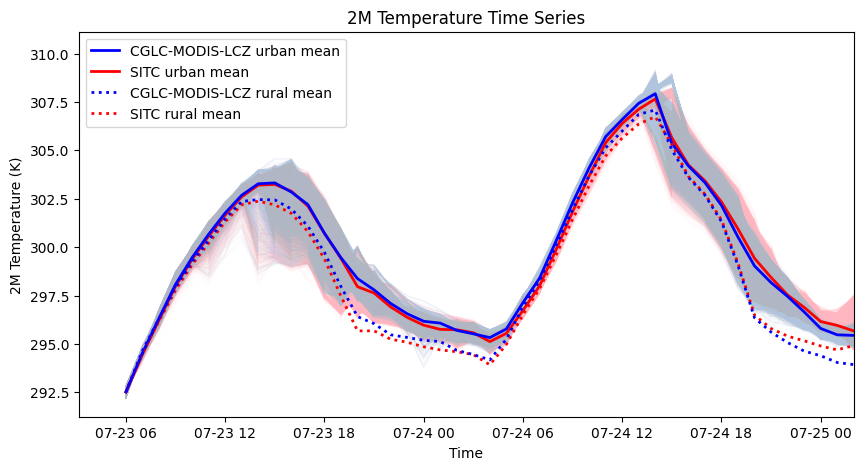

In [15]:
fig2, ax2 = plt.subplots(figsize=(10, 5))

for i in range(wur_urbanT.shape[1]):
    for j in range(wur_urbanT.shape[2]):
        ax2.plot(wur_urbanT.time.values, wur_urbanT[:, i, j], color='lightpink', linewidth=0.1, alpha=0.2)

for i in range(lcz_urbanT.shape[1]):
    for j in range(lcz_urbanT.shape[2]):
        ax2.plot(lcz_urbanT.time.values, lcz_urbanT[:, i, j], color='lightsteelblue', linewidth=0.1, alpha=0.2)

lines2 = ax2.plot(mean_urban_wur.time.values, mean_urban_wur, linestyle='-', color='red', linewidth=2)
lines3 = ax2.plot(mean_urban_lcz.time.values, mean_urban_lcz, linestyle='-', color='blue', linewidth=2)
lines4 = ax2.plot(mean_rural_wur.time.values, mean_rural_wur, linestyle=':', color='red', linewidth=2)
lines5 = ax2.plot(mean_rural_lcz.time.values, mean_rural_lcz, linestyle=':', color='blue', linewidth=2)

ax2.set_xlabel('Time')
ax2.set_ylabel('2M Temperature (K)')
ax2.set_xlim(right=wur_urbanT.time.values[-1])
plt.title('2M Temperature Time Series')

# Add legend
legend_elements = [Line2D([0], [0], linestyle='-', color='blue', lw=2, label='CGLC-MODIS-LCZ urban mean'),
                   Line2D([0], [0], linestyle='-', color='red', lw=2, label='SITC urban mean'),
                   Line2D([0], [0], linestyle=':', color='blue', lw=2, label='CGLC-MODIS-LCZ rural mean'),
                   Line2D([0], [0], linestyle=':', color='red', lw=2, label='SITC rural mean')]
ax2.legend(handles=legend_elements, loc='upper left')